In [1]:
execution_mode = 'restricted'

# Features Discussion and Dummy Classifier Baseline

The features for training and performance testing of the models have been calculated in the previous chapters. This chapter discusses the features of the feature matrix. After having gained a clear idea on the values distribution of the features depending on their class membership and after having seen the behaviour of the features in their feature space, a Dummy Classifier will be fitted to get an idea on the so called chance level, that is the statistically expectable minimal score. This minimal score will be used as a baseline for the models to be fitted in later chapters.

## Table of Contents

- [Data Takeover](#Data-Takeover)
- [Feature Values Plotting](#Feature-Values-Plotting)
- [Correlation Matrix](#Correlation-Matrix)
- [Models with Unsupervised Learning](#Models-with-Unsupervised-Learning)
    - [Principal Component Analysis - PCA](#Principal-Component-Analysis---PCA)
    - [t-SNE](#t-SNE)
    - [k-means](#k-means)
- [Dummy Classifier](#Dummy-Classifier)
    - [Train/Test Split](#Train/Test-Split)
    - [Classifier Fit and Prediction](#Classifier-Fit-and-Prediction)
    - [Performance Measurement](#Performance-Measurement)
- [Summary](#Summary)
    - [Results Handover](#Results-Handover)

## Data Takeover

Read in DataFrame from chapter [Feature Matrix Generation](./4_FeatureMatrixGeneration.ipynb) as input for processing in this chapter.

In [2]:
import os
import pandas as pd
import pickle as pk
import bz2
import _pickle as cPickle

path_goldstandard = './daten_goldstandard'

# Restore metadata so far
with open(os.path.join(path_goldstandard, 'columns_metadata.pkl'), 'rb') as handle:
    columns_metadata_dict = pk.load(handle)

# Restore DataFrame with features from compressed pickle file
with bz2.BZ2File((os.path.join(
    path_goldstandard, 'labelled_feature_matrix_full.pkl')), 'rb') as file:
    df_attribute_with_sim_feature = cPickle.load(file)

# Extend display to number of columns of DataFrame
pd.options.display.max_columns = len(df_attribute_with_sim_feature.columns)

df_attribute_with_sim_feature.sample(n=5)

,duplicates,coordinate_E_delta,coordinate_E_x,coordinate_E_y,coordinate_N_delta,coordinate_N_x,coordinate_N_y,corporate_full_delta,corporate_full_x,corporate_full_y,doi_delta,doi_x,doi_y,edition_delta,edition_x,edition_y,exactDate_delta,exactDate_x,exactDate_y,format_postfix_delta,format_postfix_x,format_postfix_y,format_prefix_delta,format_prefix_x,format_prefix_y,isbn_delta,isbn_x,isbn_y,ismn_delta,ismn_x,ismn_y,musicid_delta,musicid_x,musicid_y,part_delta,part_x,part_y,person_100_delta,person_100_x,person_100_y,person_245c_delta,person_245c_x,person_245c_y,person_700_delta,person_700_x,person_700_y,pubinit_delta,pubinit_x,pubinit_y,scale_delta,scale_x,scale_y,ttlfull_245_delta,ttlfull_245_x,ttlfull_245_y,ttlfull_246_delta,ttlfull_246_x,ttlfull_246_y,volumes_delta,volumes_x,volumes_y
257289,0,-0.050,e0074147,,-0.05,n0460833,,-0.10,,,-0.1,,,-0.10,,,0.500,1862aaaa,1982uuuu,0.111111,010300,020000,0.0,mp,bk,1.0,[],[],-0.1,,,-0.05,,8571,0.00,"bl. 23, ed. 1862",10,-0.05,dufourguillaume henri,,0.543401,g.h. dufour direxit ; h. müllhaupt sculpsit,sigrid kessler... [et al.] ; [éd.:] interkanto...,-0.050000,müllhaupthans heinrich,,-0.050000,,staatlicher lehrmittelverlag,-0.05,100000,,0.467633,"domo d'ossola, arona","bonne chance!, cours de langue française, deux...",-0.10,,,0.530201,1 karte,2 cassettes sonores
228507,0,-0.100,,,-0.10,,,-0.05,interkantonale lehrmittelzentrale (luzern),,-0.1,,,-0.10,,,0.250,19829999,2017uuuu,0.428571,030000,020000,0.0,vm,bk,0.0,[],[978-0-7294-1151-6],-0.1,,,-0.10,,,-0.05,,20 c,-0.05,,voltaire,0.629134,sigrid kessler... [et al.] ; [éd.:] interkanto...,critical edition by nicholas cronk and j.b. sh...,-0.050000,kesslersigrid,,0.494486,staatlicher lehrmittelverlag,voltaire foundation,-0.10,,,0.594627,"bonne chance!, cours de langue française, deux...","the complete works of voltaire, micromégas and...",-0.10,,,0.000000,v.,467 p.
107218,0,-0.100,,,-0.10,,,-0.10,,,-0.1,,,-0.10,,,0.500,2005aaaa,2011uuuu,1.000000,010300,010300,1.0,vm,vm,1.0,[],[],-0.1,,,-0.10,,,-0.05,,z 1,-0.10,,,0.662664,ein film von luc jacquet,ein film von volker schlöndorff ; nach dem rom...,0.430995,jacquetluc,"schlöndorffvolker, frischmax, delpyjulie, shep...",0.464286,frenetic films,suhrkamp,-0.10,,,0.367677,die reise der pinguine,homo faber,-0.10,,,0.839458,1 dvd-video (ca. 82 min.),1 dvd-video (117 min.)
231236,0,-0.100,,,-0.10,,,-0.05,,"interkantonale lehrmittelzentrale (rapperswil,...",-0.1,,,-0.05,,2,0.250,1987aaaa,2003uuuu,0.428571,020000,030000,0.0,bk,vm,0.0,[],[3-292-00235-4],-0.1,,,-0.10,,,-0.10,,,-0.10,,,0.774730,heidy binder... [et al.] ; [éd.:] interkantona...,sigrid kessler... [et al.] ; [hrsg.:] interkan...,-0.050000,,kesslersigrid,0.617821,staatlicher lehrmittelverlag,schulverl. blmv,-0.10,,,0.800908,"bonne chance!, cours de langue française, prem...","bonne chance!, cours de langue française, 3, v...",-0.10,,,0.666667,134 p.,180 s.
78405,0,0.375,e0060811,e0074147,0.50,n0461242,n0460833,-0.05,,eidgenössische landestopographie,-0.1,,,-0.10,,,0.375,17001799,1943uuuu,0.428571,010700,010300,1.0,mp,mp,1.0,[],[],-0.1,,,-0.10,,,-0.05,,"bl. 23, 23,1943",-0.10,,,-0.050000,,g. h. dufour direxit ; h. müllhaupt sculpsit,-0.050000,,"dufourguillaume-henri, müllhauptheinrich",-0.050000,,[eidg. landestopographie],-0.05,,100000,0.349145,"genéve, genff","domo d'ossola, arona",-0.05,,"[domodossola, arona]",0.616667,1 ansicht,2 karten


The columns with the original attribute values need to be dropped to generate the feature matrix for modelling the estimators.

In [3]:
# Reduce feature DataFrame to all delta and 'duplicates' columns
df_labelled_feature_matrix = df_attribute_with_sim_feature[columns_metadata_dict['features']]

for i in range(2):
    display(df_labelled_feature_matrix[df_labelled_feature_matrix.duplicates==i].sample(n=10))

,coordinate_E_delta,coordinate_N_delta,corporate_full_delta,doi_delta,edition_delta,exactDate_delta,format_prefix_delta,format_postfix_delta,isbn_delta,ismn_delta,musicid_delta,part_delta,person_100_delta,person_700_delta,person_245c_delta,pubinit_delta,scale_delta,ttlfull_245_delta,ttlfull_246_delta,volumes_delta,duplicates
230585,-0.10,-0.10,-0.100000,-0.10,-0.10,0.500,1.0,0.428571,1.0,-0.1,-0.1,0.708333,-0.100000,-0.10,-0.050000,-0.050000,-0.10,0.861687,-0.10,-0.050000,0
96419,-0.10,-0.10,-0.100000,-0.10,-0.10,0.250,1.0,1.000000,0.0,-0.1,-0.1,-0.050000,0.514722,-0.05,0.596023,0.598291,-0.10,0.431159,-0.10,0.666667,0
219753,-0.10,-0.10,-0.100000,-0.10,-0.10,0.250,0.0,0.428571,0.0,-0.1,-0.1,0.444444,0.474359,-0.05,0.463301,0.378431,-0.10,0.531521,-0.10,0.666667,0
112683,-0.10,-0.10,-0.100000,-0.10,-0.05,0.250,1.0,1.000000,0.0,-0.1,-0.1,-0.050000,-0.050000,-0.10,0.616930,0.622222,-0.10,0.510256,-0.10,0.555556,0
60418,-0.10,-0.10,-0.100000,-0.10,-0.10,0.500,0.0,0.428571,1.0,-0.1,-0.1,0.000000,-0.050000,-0.05,0.637994,-0.050000,-0.10,0.553993,-0.10,0.529259,0
236765,-0.10,-0.10,-0.050000,-0.10,-0.10,0.250,0.0,0.000000,0.0,-0.1,-0.1,-0.100000,-0.050000,-0.05,0.553513,-0.050000,-0.10,0.496926,-0.10,0.000000,0
201458,-0.10,-0.10,-0.050000,-0.10,-0.10,0.625,0.0,0.111111,0.0,-0.1,-0.1,-0.100000,-0.050000,-0.05,-0.050000,-0.050000,-0.10,0.495148,-0.05,-0.050000,0
157276,-0.05,-0.05,0.127273,-0.10,-0.10,0.500,0.0,0.428571,0.0,-0.1,-0.1,-0.050000,-0.100000,-0.05,0.565829,0.567521,-0.05,0.319298,-0.05,-0.050000,0
221239,-0.10,-0.10,-0.100000,-0.05,-0.10,0.625,1.0,0.111111,1.0,-0.1,-0.1,0.000000,-0.050000,-0.10,0.527350,-0.050000,-0.10,0.478036,-0.10,-0.050000,0
213244,-0.10,-0.10,-0.050000,-0.10,-0.10,0.625,1.0,0.111111,1.0,-0.1,-0.1,-0.050000,-0.050000,-0.10,-0.050000,-0.100000,-0.10,0.481003,-0.05,-0.050000,0


,coordinate_E_delta,coordinate_N_delta,corporate_full_delta,doi_delta,edition_delta,exactDate_delta,format_prefix_delta,format_postfix_delta,isbn_delta,ismn_delta,musicid_delta,part_delta,person_100_delta,person_700_delta,person_245c_delta,pubinit_delta,scale_delta,ttlfull_245_delta,ttlfull_246_delta,volumes_delta,duplicates
1202,-0.100,-0.100,-0.1,-0.10,1.0,0.75,1.0,1.0,0.5,-0.1,-0.1,-0.10000,1.0,-0.05,1.000000,-0.05,-0.1,1.000000,-0.1,0.596825,1
1245,-0.100,-0.100,-0.1,-0.05,1.0,0.75,1.0,1.0,1.0,-0.1,-0.1,-0.10000,1.0,1.00,1.000000,-0.10,-0.1,1.000000,-0.1,0.962963,1
419,-0.100,-0.100,-0.1,-0.10,-0.1,0.75,1.0,1.0,1.0,-0.1,-0.1,-0.10000,1.0,1.00,0.845843,-0.05,-0.1,1.000000,-0.1,0.436508,1
863,0.875,0.875,1.0,-0.10,-0.1,0.75,1.0,1.0,1.0,-0.1,-0.1,0.84902,-0.1,-0.10,-0.100000,-0.05,1.0,1.000000,-0.1,1.000000,1
1365,-0.100,-0.100,-0.1,-0.10,-0.1,0.75,1.0,1.0,1.0,-0.1,-0.1,-0.10000,1.0,1.00,0.871360,1.00,-0.1,1.000000,-0.1,1.000000,1
437,-0.100,-0.100,1.0,-0.10,-0.1,0.75,1.0,1.0,1.0,-0.1,1.0,-0.10000,1.0,-0.05,0.713178,-0.05,-0.1,0.791667,-0.1,0.650000,1
1341,-0.100,-0.100,-0.1,-0.05,-0.1,0.75,1.0,1.0,1.0,-0.1,-0.1,-0.10000,1.0,-0.05,0.800420,-0.05,-0.1,1.000000,-0.1,0.532258,1
46,-0.100,-0.100,-0.1,-0.10,-0.1,0.75,1.0,1.0,1.0,-0.1,-0.1,0.00000,1.0,-0.10,1.000000,-0.05,-0.1,1.000000,-0.1,1.000000,1
240,-0.100,-0.100,-0.1,-0.10,-0.1,0.75,1.0,1.0,1.0,-0.1,-0.1,1.00000,1.0,-0.10,1.000000,1.00,-0.1,1.000000,-0.1,1.000000,1
951,-0.100,-0.100,-0.1,-0.10,-0.1,0.75,1.0,1.0,1.0,-0.1,-0.1,1.00000,1.0,1.00,1.000000,-0.10,-0.1,1.000000,-0.1,1.000000,1


In [4]:
print('Part of duplicates (1) on uniques (0) in units of [%]')
print(round(df_labelled_feature_matrix.duplicates.value_counts(normalize=True)*100, 2))

Part of duplicates (1) on uniques (0) in units of [%]
0    99.43
1     0.57
Name: duplicates, dtype: float64


## Feature Values Plotting

By now, the features have become purely numerical values. The values distribution of each feature will be plotted in this section. The plot graphs below consist of two sides for each graph line. For most cases, the similarity values for attribute pairs with missing values on one or both sides of the pair have been set to negative values with the goal to mark them specifically, see chapter [Feature Matrix Generation](./4_FeatureMatrixGeneration.ipynb). On the left hand side of a plotted feature graph line, the data with the full feature value range is displayed. Explicitly, eventual negative values are displayed, too. On the right hand side of a plotted graph line of a feature, only positive values are displayed. Omitting negative values for the similarity features points out the effect of the similarity function better.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

left_xlim_all = -1.1
left_xlim_0 = -0.1
right_xlim = 1.1
no_bins = 33

def plot_feature_histogram (df, attrib) :
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))

    fig.suptitle(f'{attrib} counts per similarity value')
    ax0.hist([df[attrib+'_delta'][df.duplicates==1],
              df[attrib+'_delta'][df.duplicates==0]],
             bins=np.linspace(left_xlim_all, right_xlim, no_bins),
             density=True, align='mid', color=['green', 'red'],
             label=['duplicates', 'uniques'])
#    ax0.set_title(f'{attrib} counts per similarity value')
    ax0.set_xlabel('similarity value')
    ax0.set_xlim([left_xlim_all, right_xlim])
    ax0.set_ylabel('number of counts in bin\n(normed to 1st bar height)')
    ax0.legend()

    ax1.hist([df[attrib+'_delta'][(df[attrib+'_delta']>=0.0) & (df.duplicates==1)],
              df[attrib+'_delta'][(df[attrib+'_delta']>=0.0) & (df.duplicates==0)]],
             bins=np.linspace(left_xlim_0, right_xlim, no_bins),
             density=True, align='mid', color=['green', 'red'],
             label=['duplicates', 'uniques'])
#    ax1.set_title(f'{attrib} counts per similarity value')
    ax1.set_xlabel('similarity value')
    ax1.set_xlim([left_xlim_0, right_xlim])
#    ax1.set_ylabel('number of counts in bin\n(normed to 1st bar height)')
    ax1.legend()

    plt.show()

    return None

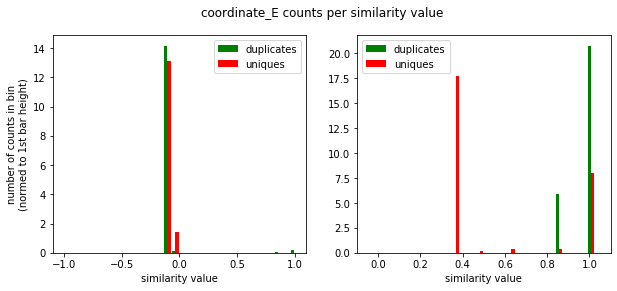

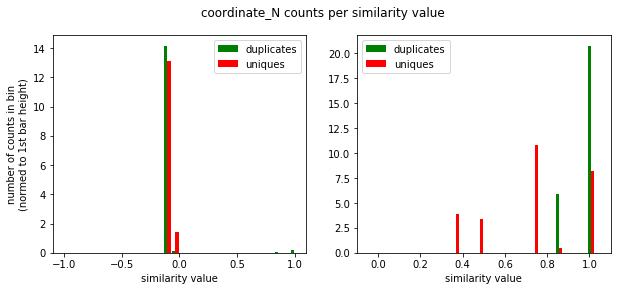

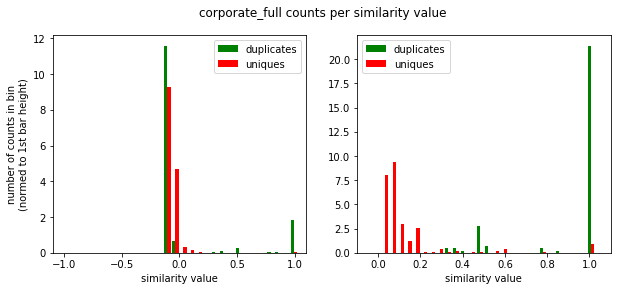

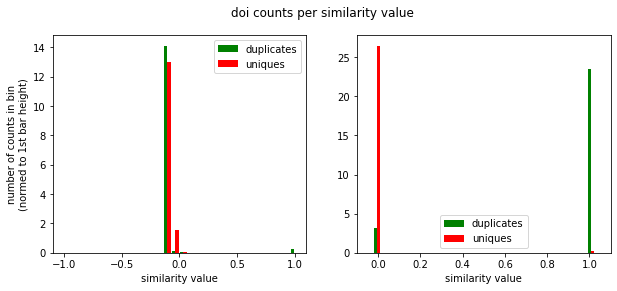

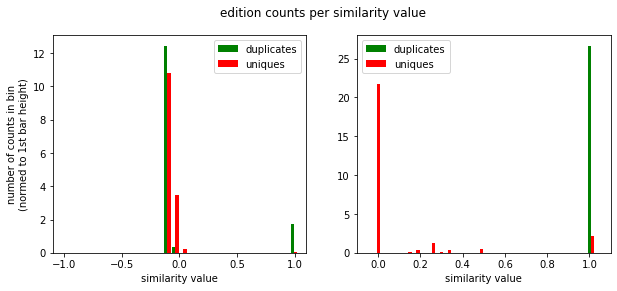

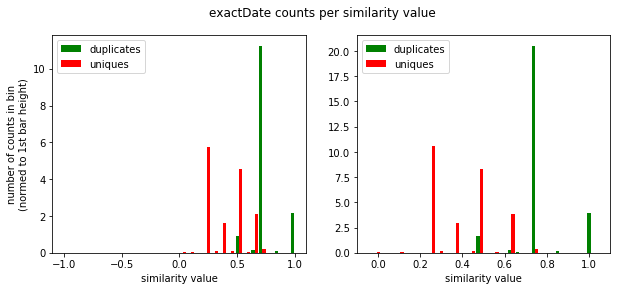

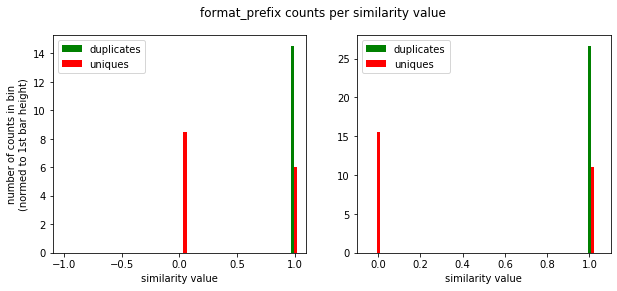

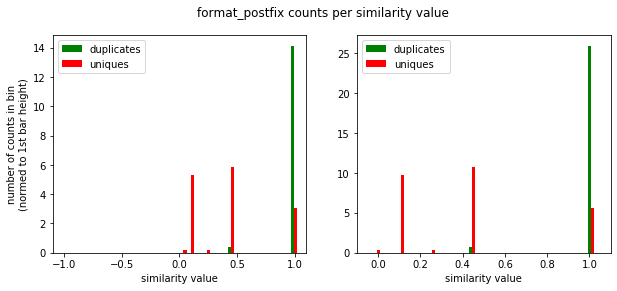

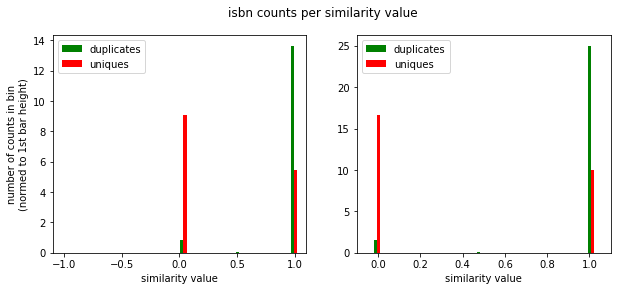

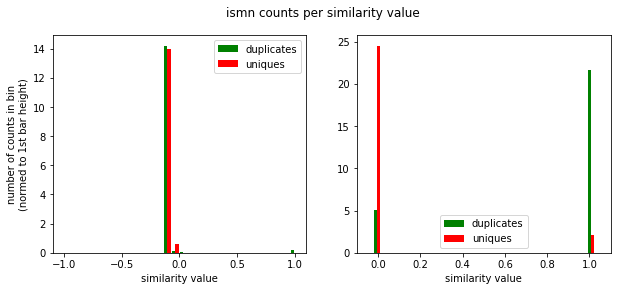

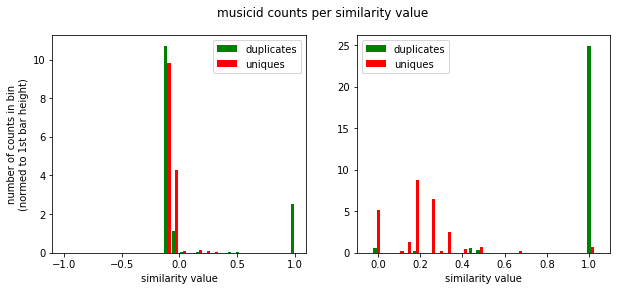

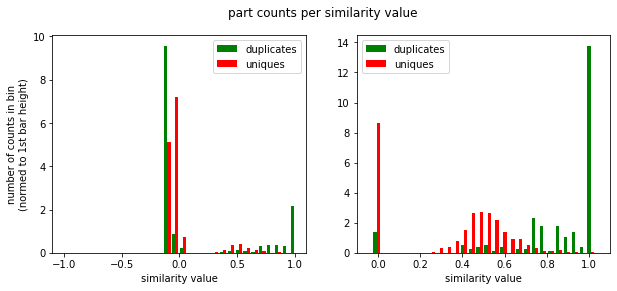

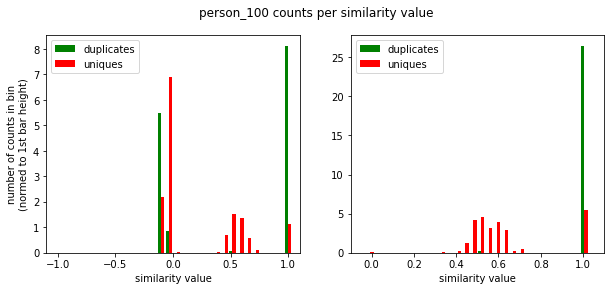

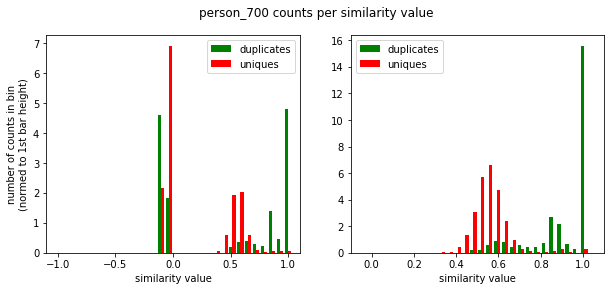

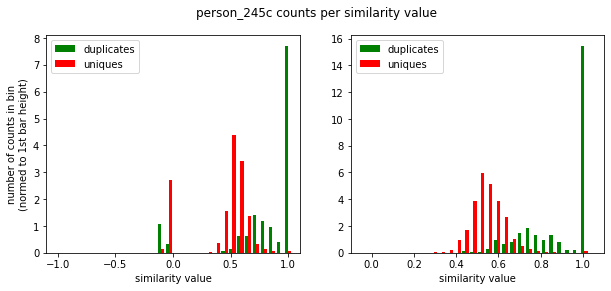

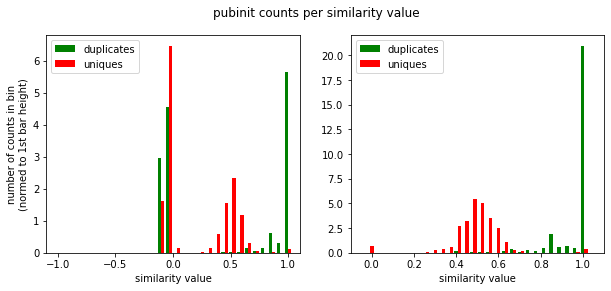

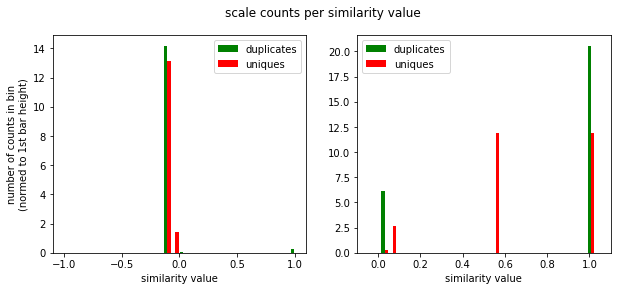

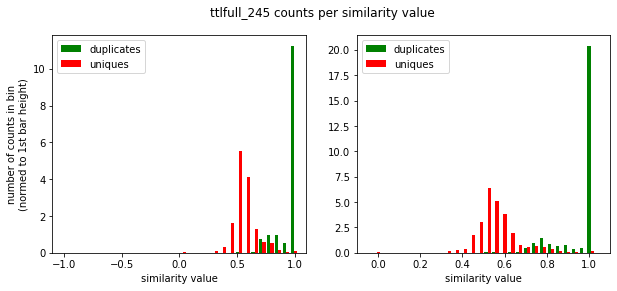

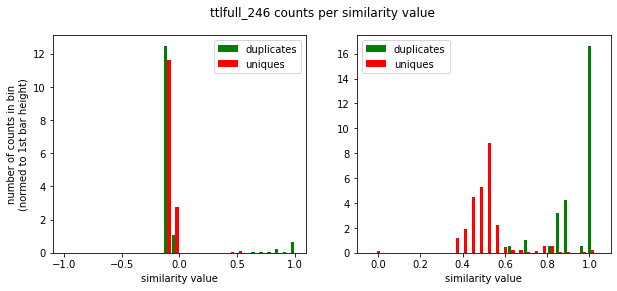

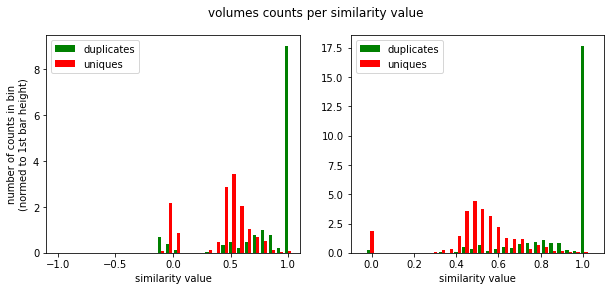

In [6]:
for i in df_labelled_feature_matrix.columns :
    if i not in ['duplicates'] :
        plot_feature_histogram(df_labelled_feature_matrix, i[:-6])

The graphs above, are built up systematically. The similarity values for each class are plotted with a different colour. Pairs of records of uniques are plotted in red, while pairs of records of duplicates are plotted in green colour.

All graphs are plotted with parameter $\texttt{density} = \texttt{True}$. This parameter has the effect of normalizing all values of a plot to the first element of the return tuple, see [matplotlib documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html). This way of plotting the graphs has been decided due to the degree of filling of an attribute value in Swissbib's raw data. This degree of filling can vary strongly, depending on the specific attribute. Therefore, the amount of missing value may be dominant for some attributes and the real similarities may vanish in this big set. To give visibility to the relevant values, the $y$-axis of the plots has been let floating freely, while the height of the feature amounts has been normalized.

The kind of graphical representation of the data used is a histogram. A histogram aggregates a distribution of points to buckets of a predefined range and counts the number of points in the corresponding bucket. This mechanism leads to plots with discrete bars. It might be surprising that some features show a nice statistical distribution of values between 0 and 1, like e.g. attribute $\texttt{person}$, while others, like e.g. attribute $\texttt{ismn}$, show a very limited set of values of 0 and 1. The reason for each specific distribution behaviour of the similarity values of an attribute is given by the specific similarity value being used for the attribute and is documented in chapter [Feature Matrix Generation](./4_FeatureMatrixGeneration.ipynb).

In the course of this capstone project, the graphs plotted above have been repeatedly analysed for assessing and deciding the similarity metrics of chapter [Feature Matrix Generation](./4_FeatureMatrixGeneration.ipynb). For deciding whether a similarity metric for an attribute is effective for a machine learning model, its power of separating members of class duplicates from members of class uniques has been analysed. Depending on the type of attribute and depending on the desired separation statement for the attribute the type of similarity metric may vary strongly. In the course of the capstone project, this metric selection process has been done visually with the help of the graphs above. The final result of this iterative feature engineering is documented in chapter [Feature Matrix Generation](./4_FeatureMatrixGeneration.ipynb) and the graphs displayed here will not be discussed deeper in this chapter. The graphs are to be seen as documentation of the effect of the similarity metrics used for each attribute.

The separation potential of all similarity metrics can be analysed generally with the help of unsupervised learning. Three such machine learning models will be fitted in a later section of this chapter.

## Correlation Matrix

Before trying unsupervised learning models, the independence of the features has to be shown. For this goal, the correlations of the features shall be analysed.

In [7]:
df_labelled_feature_matrix.corr()

,coordinate_E_delta,coordinate_N_delta,corporate_full_delta,doi_delta,edition_delta,exactDate_delta,format_prefix_delta,format_postfix_delta,isbn_delta,ismn_delta,musicid_delta,part_delta,person_100_delta,person_700_delta,person_245c_delta,pubinit_delta,scale_delta,ttlfull_245_delta,ttlfull_246_delta,volumes_delta,duplicates
coordinate_E_delta,1.000000,0.972836,0.372802,-0.032930,0.048255,-0.007390,-0.076311,-0.005795,0.097496,-0.013782,-0.041141,0.200059,-0.128705,0.047913,-0.054116,0.042453,0.949127,0.006049,0.200708,0.081354,0.030642
coordinate_N_delta,0.972836,1.000000,0.395783,-0.030829,0.046337,-0.003772,-0.059023,0.005773,0.094005,-0.013104,-0.038545,0.200010,-0.118760,0.036944,-0.060867,0.041032,0.943803,0.020888,0.178783,0.084085,0.026365
corporate_full_delta,0.372802,0.395783,1.000000,-0.049807,0.012607,0.033546,-0.063402,-0.018272,0.128959,-0.029925,0.014079,-0.012181,-0.179804,0.005957,-0.115311,0.076637,0.386219,0.072273,0.394846,-0.026735,0.147799
doi_delta,-0.032930,-0.030829,-0.049807,1.000000,-0.009776,0.001207,0.101367,-0.100638,0.086321,-0.019670,-0.061218,0.074281,0.005706,-0.081839,0.007215,-0.224345,-0.030635,-0.084115,-0.044832,-0.357756,0.062009
edition_delta,0.048255,0.046337,0.012607,-0.009776,1.000000,0.027219,0.063551,0.094788,-0.076264,0.018025,-0.047773,0.018405,-0.020273,0.072781,0.068045,0.045439,0.044745,0.030850,0.021546,0.077272,0.147660
exactDate_delta,-0.007390,-0.003772,0.033546,0.001207,0.027219,1.000000,0.043114,0.033475,0.072911,0.023862,0.067378,0.004810,0.067968,0.012859,0.040664,0.013882,-0.006194,0.121520,0.003952,0.035471,0.181527
format_prefix_delta,-0.076311,-0.059023,-0.063402,0.101367,0.063551,0.043114,1.000000,0.608106,-0.135551,-0.054114,-0.043485,0.105544,0.179989,-0.037946,0.076693,0.000295,-0.061011,0.123575,-0.073129,0.117409,0.088827
format_postfix_delta,-0.005795,0.005773,-0.018272,-0.100638,0.094788,0.033475,0.608106,1.000000,-0.054993,-0.023581,-0.013575,0.027328,0.106831,0.041945,0.140231,0.116908,0.003408,0.172636,-0.044310,0.337111,0.126200
isbn_delta,0.097496,0.094005,0.128959,0.086321,-0.076264,0.072911,-0.135551,-0.054993,1.000000,0.062339,0.219058,-0.084036,-0.032669,-0.027986,-0.134869,-0.032442,0.092993,0.156571,0.090521,-0.067657,0.087522
ismn_delta,-0.013782,-0.013104,-0.029925,-0.019670,0.018025,0.023862,-0.054114,-0.023581,0.062339,1.000000,0.247929,0.002967,0.104339,0.069326,0.061185,0.006718,-0.012982,0.064918,-0.024359,0.041773,0.058410


The correlation matrix can be graphically displayed with the help of a Seaborn heatmap.

Text(0.5, 1, 'heatmap features and target correlations')

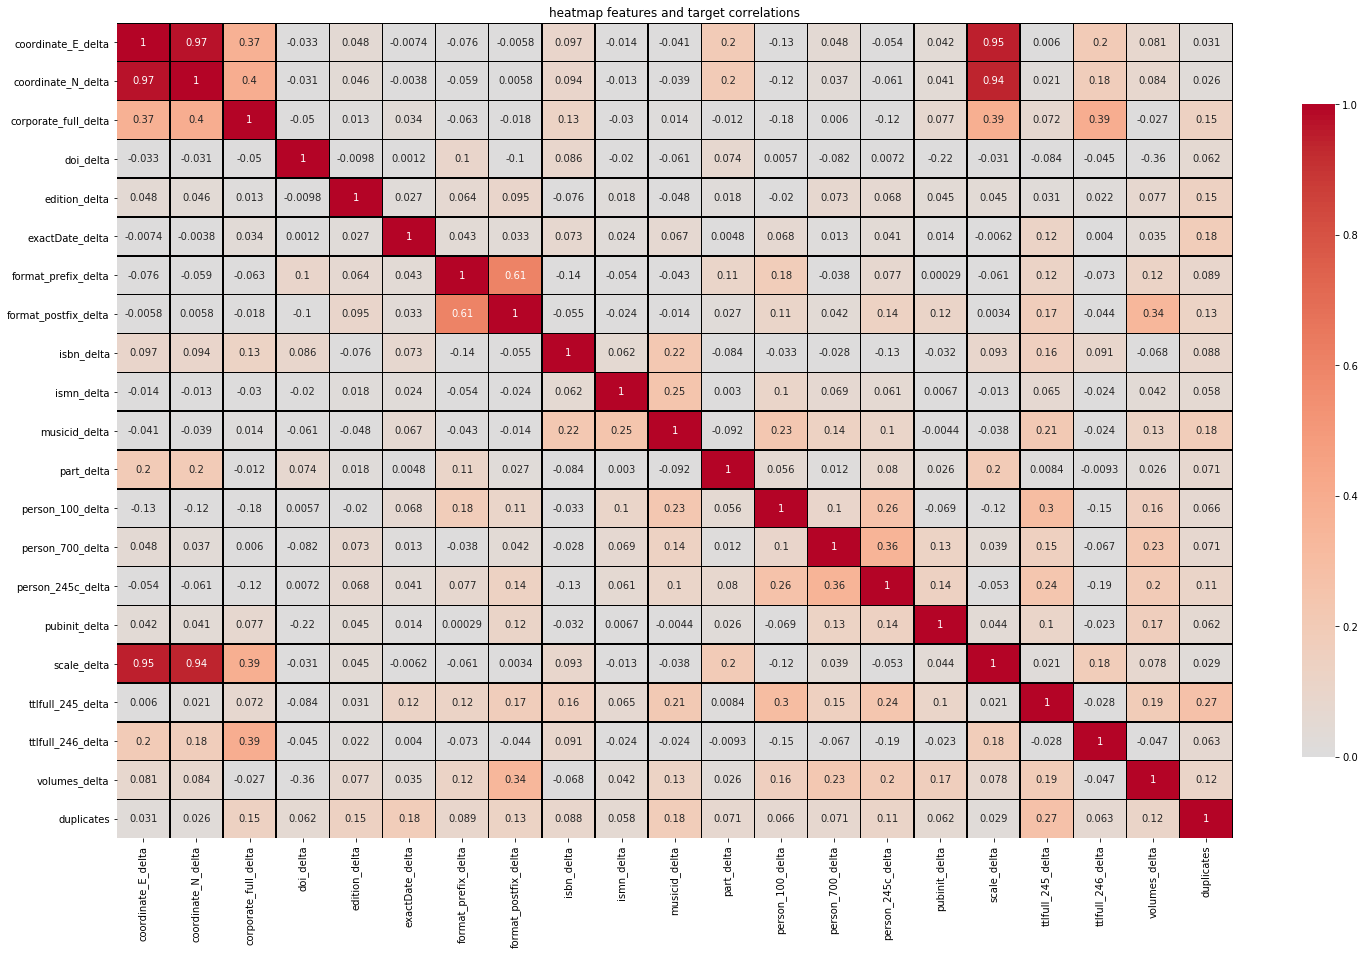

In [8]:
import seaborn as sns

f = plt.subplots(figsize=(25, 15))
ax = sns.heatmap(df_labelled_feature_matrix.corr(), annot=True, square=False, fmt='.2g',
            vmin=.0, vmax=1.0, center=0, cmap= 'coolwarm', linewidths=.5, linecolor='black',
            cbar_kws={"shrink": .8})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('heatmap features and target correlations')

In the heatmap above, features $\texttt{coordnate}\_\texttt{<x>}\_\texttt{delta}$ ($\texttt{<x>} = \texttt{E}, \texttt{N}$) together with $\texttt{scale}\_\texttt{delta}$ show a strong correlation, close to a value of 1. The reason for these correlations is the sparse filling of the corresponding attributes in Swissbib's raw data and their presence, exclusively for bibliographical units of maps.

As for the target $\texttt{duplicates}$, two features stand out with higher correlation values compared to the rest of the feature values. Feature $\texttt{exactDate}\_\texttt{delta}$ and feature $\texttt{ttlfull}\_\texttt{245}\_\texttt{delta}$ are the most significant ones for the models that will be calculated. This will be confirmed in chapter [Decision Tree Model](./6_DecisionTreeModel.ipynb) by the Random Forests Classifier model. The weaker correlation to feature $\texttt{ttlfull}\_\texttt{246}\_\texttt{delta}$ is due to the fact that this attribute is filled sparsely.

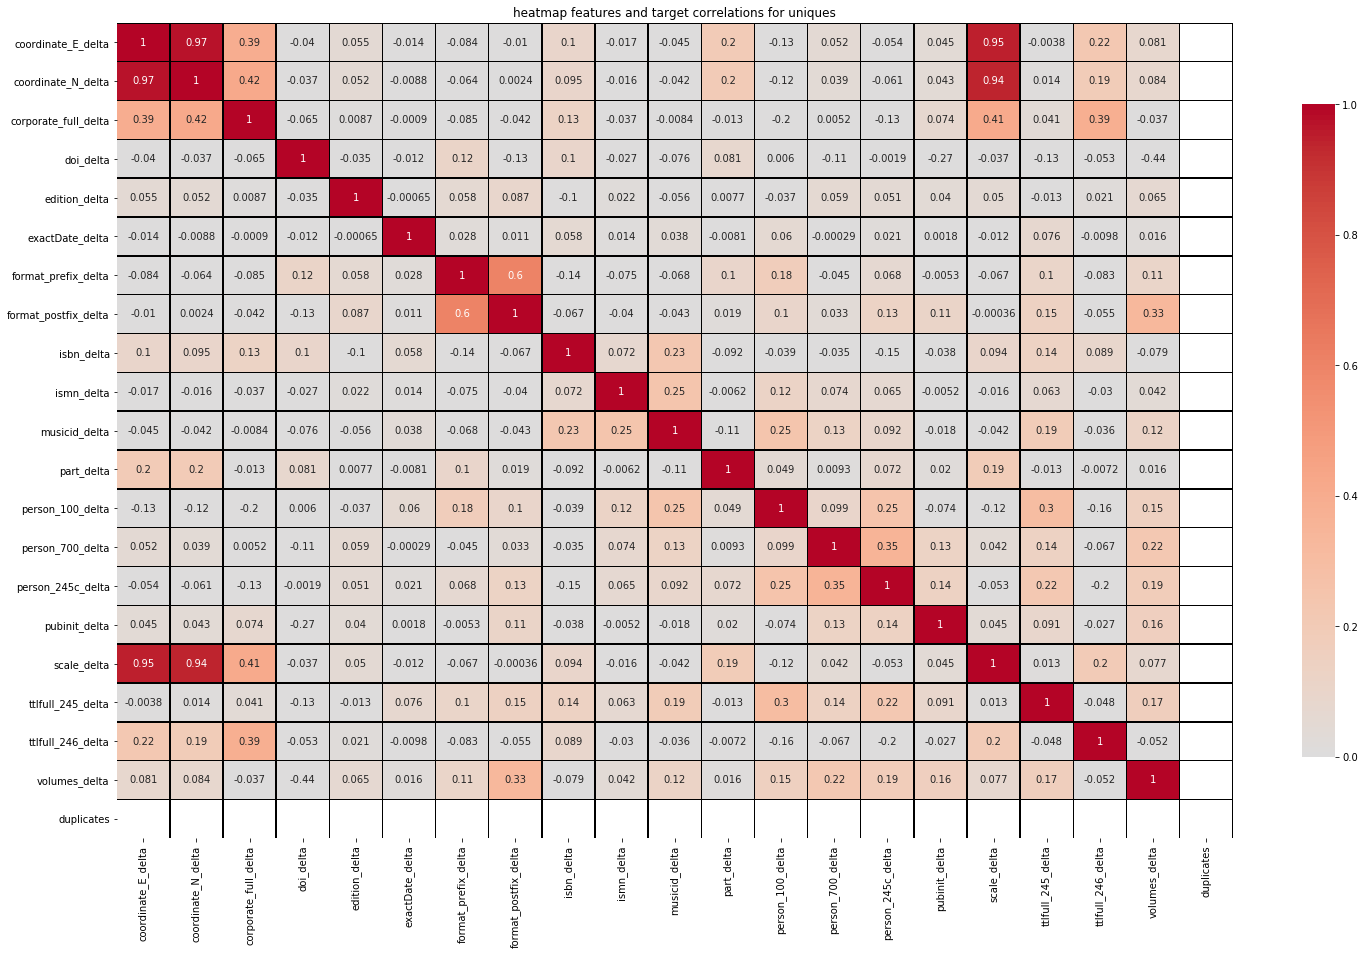

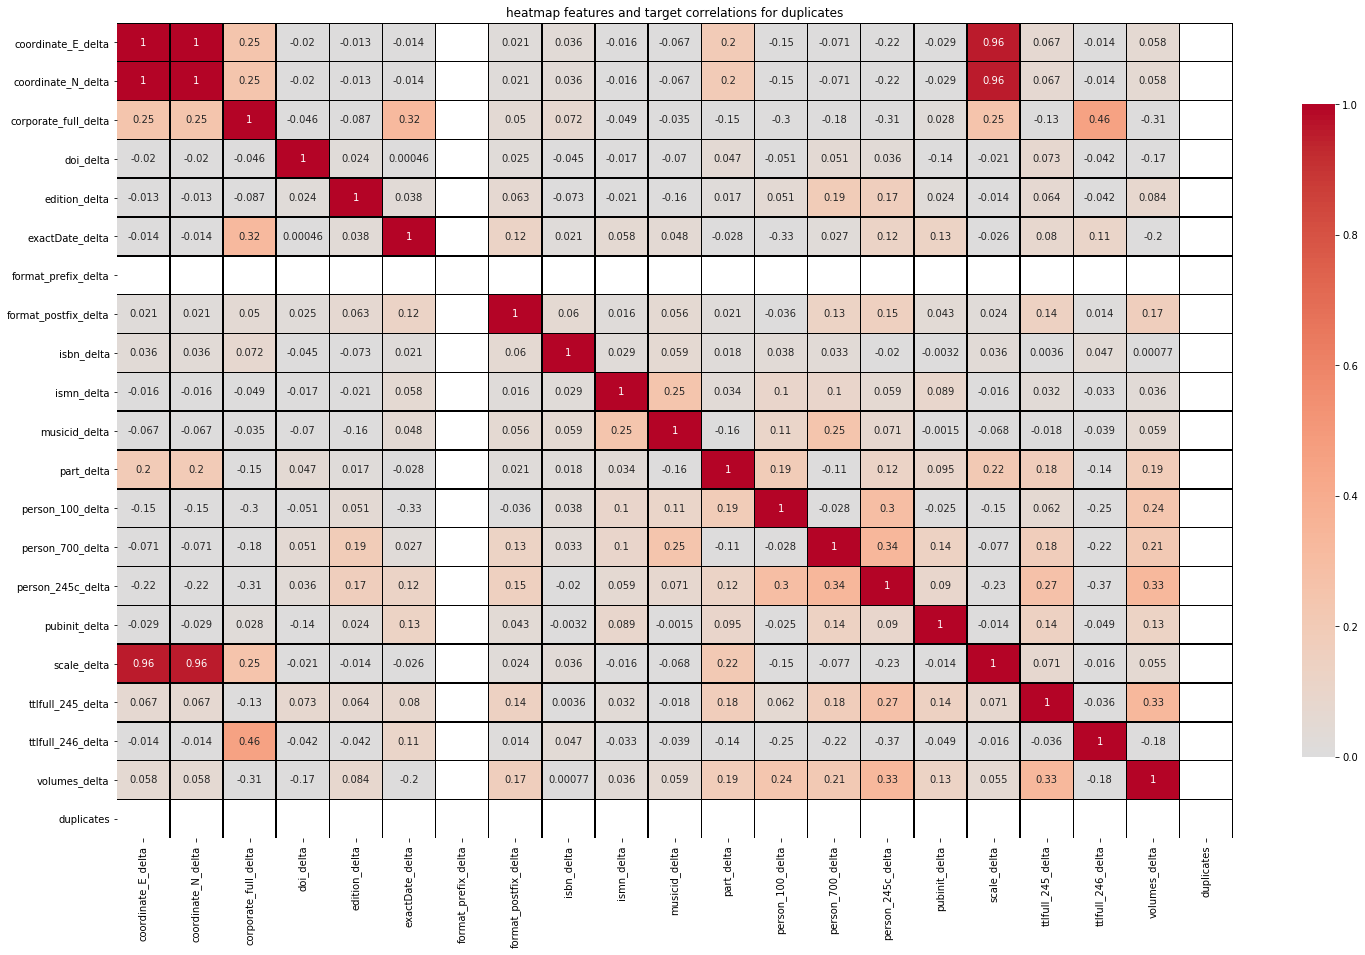

In [9]:
for i in range(2):
    f = plt.subplots(figsize=(25, 15))
    ax = sns.heatmap(
        df_labelled_feature_matrix[df_labelled_feature_matrix.duplicates==i].corr(),
        annot=True, square=False, fmt='.2g', vmin=.0, vmax=1.0, center=0,
        cmap= 'coolwarm', linewidths=.5, linecolor='black', cbar_kws={"shrink": .8})
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    if i==0 :
        ax.set_title('heatmap features and target correlations for uniques')
    elif i==1 :
        ax.set_title('heatmap features and target correlations for duplicates')

Splitting the heatmap of feature correlations into a separate heatmap for each class, leads to the graphs above. The white row for feature $\texttt{format}\_\texttt{prefix}\_\texttt{delta}$ indicates that all similarity values of this feature for duplicate rows are equal to 1.

In [10]:
df_labelled_feature_matrix.format_prefix_delta[df_labelled_feature_matrix.duplicates==1].unique()

array([1.])

The correlation heatmap does not show any dangerous constellations that might negatively influence the model fitting. Therefore, it confirms the validity of the features.

## Models with Unsupervised Learning

This section answers the general question whether the features of the feature matrix carry enough information to separate the two classes of duplicates and uniques. Hereby, the training of a model is done in the absence of information on the two classes. The model has to find the separation on its own. Three different methods will be tryed.

### Principal Component Analysis - PCA

A Principal Component Analysis (PCA) calculates the principal components of a feature matrix. The principal components state the contribution of a component for classification, where the PCA classifier tries to find its classes on its own without knowing the information of the target vector.

In [11]:
from sklearn.decomposition import PCA

X = df_labelled_feature_matrix.drop(columns=['duplicates']).values
y = df_labelled_feature_matrix.duplicates.values

# Create PCA transformer
pca = PCA(n_components=None)

# Apply PCA
pca.fit(X, y=None) # Unsupervised learning, no target variable

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

The contribution to defining the model can be calculated for each principal component with the help of the variance explained.

In [12]:
# Proportion of variables explained
pve = pca.explained_variance_ratio_
pve

array([2.87583429e-01, 1.98344138e-01, 1.31857941e-01, 1.04654878e-01,
       6.73010910e-02, 5.77756633e-02, 3.99147710e-02, 3.54197903e-02,
       2.98408481e-02, 2.00122570e-02, 8.69578786e-03, 5.95520178e-03,
       3.91026294e-03, 3.10244617e-03, 3.01905222e-03, 2.03301475e-03,
       2.89706512e-04, 1.76355739e-04, 8.31574265e-05, 3.02074100e-05])

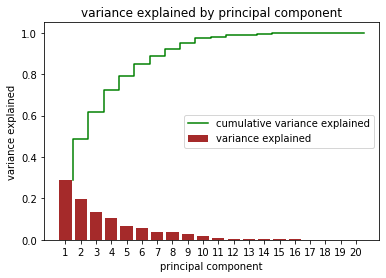

In [13]:
# Create bar plot
xcor = np.arange(1, len(pve) + 1) # 1, 2, ..., n_components
plt.bar(xcor, pve, color='brown', label='variance explained')
plt.xticks(xcor)

# Add cumulative sum
pve_cumsum = np.cumsum(pve)
plt.step(
    xcor+0.5, # 1.5, 2.5, ..., n_components+0.5
    pve_cumsum, # Cumulative sum
    label='cumulative variance explained',
    color='green'
)

# Add labels
plt.title('variance explained by principal component')
plt.xlabel('principal component')
plt.ylabel('variance explained')
plt.legend()
plt.show()

The plot above shows the variance explained for each principal component with the brown coloured bars. The variances explained are ordered by their size values. The green step curve represents the cumulated sum of the contribution of the principal components.

In [14]:
variance_to_be_retained = [0.8, 0.9, 0.95, 0.99]

for i in variance_to_be_retained:
    print('* To retain {:.0f}% of the variance explained, we have to keep {:d} ...'.
          format(i*100, len(pve_cumsum[pve_cumsum <= i])))

print('... out of a total of {:d} components.'.format(len(pve)))

* To retain 80% of the variance explained, we have to keep 5 ...
* To retain 90% of the variance explained, we have to keep 7 ...
* To retain 95% of the variance explained, we have to keep 8 ...
* To retain 99% of the variance explained, we have to keep 12 ...
... out of a total of 20 components.


The first two components add-up to the variance explained shown below. With a total number of components of 19, the computation time of the models will remain in acceptable time ranges. There will be no use to reduce the number of components for calculating the models and all components will be kept in the feature matrix.

In [15]:
print(f'Variance explained of two first components {100*(pve[0] + pve[1]):.1f}%.')

Variance explained of two first components 48.6%.


Looking at these two first components only, results in the plot below.

In [16]:
# Create PCA transformer
pca_2 = PCA(n_components=2)

# Apply PCA
pca_2.fit(X, y=None) # Unsupervised learning, no target variable

# Project data onto the first two components
X_2d = pca_2.transform(X)

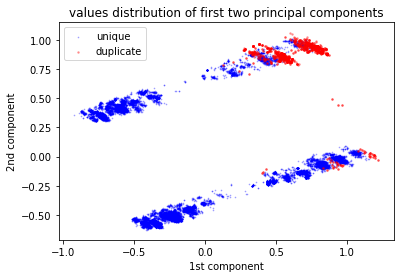

In [17]:
duplicate_category = ['unique', 'duplicate'] # Watch : Order is important
colors = ['blue', 'red']

# Plot points for duplicates and uniques
for dupes in range(len(duplicate_category)):
    # Filter for duplicates or uniques
    idx = (y == dupes)
    
    # Plot their components
    plt.scatter(
        X_2d[idx, 0][:20000], X_2d[idx, 1][:20000],
        label=f'{duplicate_category[dupes]}', marker='.', s=2 if dupes==0 else 10,
        color=colors[dupes], alpha=0.3
    )

# Labels and legend
plt.legend()
plt.title('values distribution of first two principal components')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

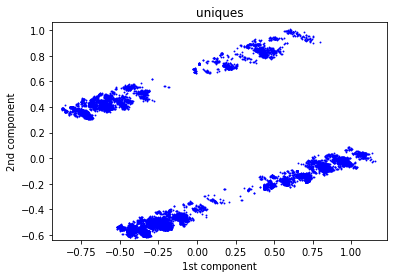

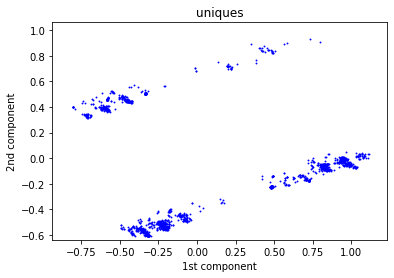

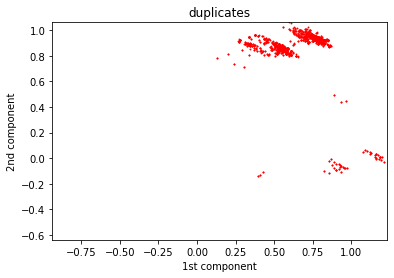

In [18]:
# All plot sizes must be equal
x_min, x_max = np.min(X_2d[:, 0]), np.max(X_2d[:, 0])
y_min, y_max = np.min(X_2d[:, 1]), np.max(X_2d[:, 1])
number_of_duplicates = len(X_2d[y == 1])

# Each category in its own plot
for dupes in range(len(duplicate_category)):
    for multiplyer in [10, 1]:
        if not ((multiplyer > 1) and (dupes == 1)):
            idx = (y == dupes)
            
            # Plot with all components
            plt.scatter(X_2d[idx, 0][:number_of_duplicates*multiplyer],
                        X_2d[idx, 1][:number_of_duplicates*multiplyer],
                        marker='.', s=3,
                        color=colors[dupes])
            plt.xlabel('1st component')
            plt.ylabel('2nd component')
            plt.xlim(x_min, x_max)
            plt.ylim(y_min, y_max)
            plt.title('{}s'.format(duplicate_category[dupes]))
            plt.show()

The plots above show a clear distinction between the data points of class duplicate and the data points of class unique. The points of class duplicate show a strong clustering. This is a promising result for the machine learning models to be fitted in the upcoming chapters.

### t-SNE

Another classification method for unsupervised learning is [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding). The fit, analogous to PCA shows a distribution of points shown below.

In [19]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, verbose=1)

X_dupes = df_labelled_feature_matrix[df_labelled_feature_matrix.duplicates==1
                                    ].drop(columns=['duplicates']).values
X_non_dupes = df_labelled_feature_matrix[df_labelled_feature_matrix.duplicates==0
                                    ].drop(columns=['duplicates']).sample(n=10000).values

X_tsne = {}
X_tsne['duplicate'] = tsne.fit_transform(X_dupes)
X_tsne['unique'] = tsne.fit_transform(X_non_dupes)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1473 samples in 0.003s...
[t-SNE] Computed neighbors for 1473 samples in 0.077s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1473
[t-SNE] Computed conditional probabilities for sample 1473 / 1473
[t-SNE] Mean sigma: 0.000000


[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.441658


[t-SNE] KL divergence after 1000 iterations: 0.253871
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.106s...


[t-SNE] Computed neighbors for 10000 samples in 2.941s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000


[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.132214


[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.019466


[t-SNE] KL divergence after 1000 iterations: 0.523352


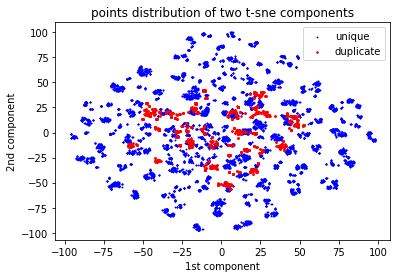

In [20]:
duplicate_category = ['unique', 'duplicate'] # Watch : Order is important
colors = ['blue', 'red']

# Plot points for duplicates and uniques
for dupes in range(len(duplicate_category)):
    # Plot their components
    plt.scatter(X_tsne[duplicate_category[dupes]][:, 0],
                X_tsne[duplicate_category[dupes]][:, 1],
                color=colors[dupes],
                marker='.', s=3 if dupes==0 else 10,
                label=f'{duplicate_category[dupes]}')
plt.legend()
plt.title('points distribution of two t-sne components')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

Again, a distinct clustering into the groups of the target can be identified. This result confirms the expectations stated from PCA that the features represent a good basis for a successful classification model.

### k-means

As the last analysis step, a k-means model will be fitted. Again, with k-means, the model tries to find its own classification in the absence of any target information.

In [21]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=0)
# Compute clsutering and transform X to cluster-distance space.
X_km = km.fit_transform(X, y=None)

X.shape, X_km.shape

((259428, 20), (259428, 2))

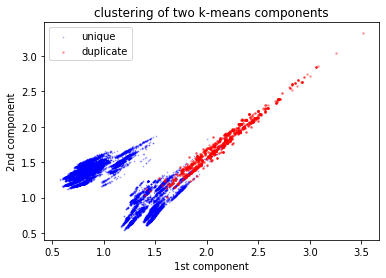

In [22]:
duplicate_category = ['unique', 'duplicate'] # Watch : Order is important
colors = ['blue', 'red']

# Plot points for duplicates and uniques
for dupes in range(len(duplicate_category)):
    # Filter for duplicates or uniques
    idx = (y == dupes)
    
    # Plot their components
    plt.scatter(
        X_km[idx, 0][:20000], X_km[idx, 1][:20000],
        label=f'{duplicate_category[dupes]}', marker='.', s=2 if dupes==0 else 10,
        color=colors[dupes], alpha=0.3
    )

# Labels and legend
plt.legend()
plt.title('clustering of two k-means components')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

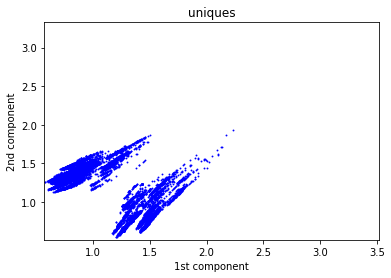

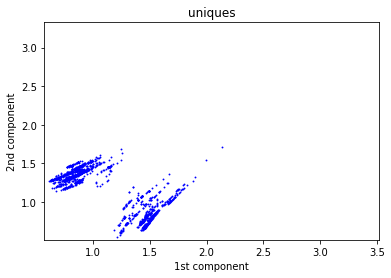

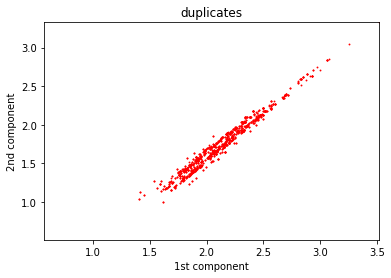

In [23]:
# All plot sizes must be equal
x_min, x_max = np.min(X_km[:, 0]), np.max(X_km[:, 0])
y_min, y_max = np.min(X_km[:, 1]), np.max(X_km[:, 1])
number_of_duplicates = len(X_km[y == 1])

# Each category in its own plot
for dupes in range(len(duplicate_category)):
    for multiplyer in [10, 1]:
        if not ((multiplyer > 1) and (dupes == 1)):
            idx = (y == dupes)
            
            # Plot with all components
            plt.scatter(X_km[idx, 0][:number_of_duplicates*multiplyer],
                        X_km[idx, 1][:number_of_duplicates*multiplyer],
                        marker='.', s=3,
                        color=colors[dupes])
            plt.xlabel('1st component')
            plt.ylabel('2nd component')
            plt.xlim(x_min, x_max)
            plt.ylim(y_min, y_max)
            plt.title('{}s'.format(duplicate_category[dupes]))
            plt.show()

The k-means classifier confirms the results so far. The class of duplicates and the class of uniques are located in separate regions.

## Dummy Classifier

Having analysed and understood the behaviour of the features in their space, the next step in the capstone project is to tain the machine learning models. The first model will be a Dummy Classifier to set a baseline. The Dummy Classifier generates a statistical model which could be described as dicing. The classification prediction of this model will be purely random. This classifier will be used as a baseline for the models to be fitted in the coming chapters. Any model being worse than the baseline must have implemented some kind of artefact.

### Train/Test Split

The train/test split has been implemented as a general function $\texttt{.split}\_\texttt{feature}\_\texttt{target}()$. See chapter [Decision Tree Model](./6_DecisionTreeModel.ipynb) for more explanation on this function. The function will be called in the following code cell.

In [24]:
import classifier_fitting_funcs as cff

X_tr, _, X_te, y_tr, _, y_te, idx_tr, _, idx_te = cff.split_feature_target(
    df_labelled_feature_matrix, 'train_test')

X_tr[:5], y_tr[:5], idx_tr[:5]

(array([[-0.1       , -0.1       , -0.05      , -0.1       , -0.1       ,
          0.25      ,  0.        ,  0.42857143,  0.        , -0.1       ,
          0.16666667, -0.1       , -0.05      , -0.05      ,  0.53888889,
          0.47991021, -0.1       ,  0.59978811, -0.1       ,  0.6502381 ],
        [-0.1       , -0.1       , -0.1       , -0.1       , -0.1       ,
          0.4375    ,  0.        ,  0.11111111,  1.        , -0.1       ,
         -0.05      , -0.1       ,  1.        ,  0.57605284,  0.59184563,
          0.41919192, -0.1       ,  0.7332472 , -0.1       ,  0.5       ],
        [-0.1       , -0.1       ,  0.05      , -0.1       , -0.1       ,
          0.25      ,  1.        ,  1.        ,  1.        , -0.1       ,
         -0.1       , -0.1       , -0.05      ,  0.52608873,  0.61453149,
          0.41568627, -0.1       ,  0.51855227, -0.1       ,  0.57777778],
        [-0.1       , -0.1       , -0.1       , -0.1       , -0.1       ,
          0.5       ,  1.        , 

In [25]:
print(X_tr.shape, y_tr.shape, X_te.shape, y_te.shape)

(207542, 20) (207542,) (51886, 20) (51886,)


### Classifier Fit and Prediction

For the Dummy Classifier, the only parameter that will be used, is the stratified strategy. This parameter asserts that the distribution of the classes in the training data is the same as in the original data set.

In [26]:
from sklearn.dummy import DummyClassifier

du = DummyClassifier(strategy='stratified', random_state=0)
du.fit(X_tr, y_tr)
y_pred = du.predict(X_te)

### Performance Measurement

**Remark** The technical notions of this subsection will be explained in the first subsection with the same title of chapter [Decision Tree Model](./6_DecisionTreeModel.ipynb).

In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_te, y_pred)

array([[51311,   280],
       [  294,     1]])

For measuring the performance of the model, the confusion matrix is used. To analyse the results of the confusion matrix specifically, the specific scorings based on the confusion matrix are calculated.

In [28]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

print('Score {:.3f}%'.format(100*du.score(X_te, y_te)))
print('Area under the curve {:.3f}% - accuracy {:.3f}% - precision {:.3f}% - recall {:.3f}%'.format(
    100*roc_auc_score(y_te, y_pred),
                100*accuracy_score(y_te, y_pred),
                100*precision_score(y_te, y_pred),
                100*recall_score(y_te, y_pred)
               ))

Score 98.894%
Area under the curve 49.898% - accuracy 98.894% - precision 0.356% - recall 0.339%


An area under the curve of 50% points to a result that has no statistical meaning other than random dicing. The accuracy value, which is equal to the overall score value, has the same amount like the number of records of unique pairs. The result above demonstrates the behaviour of the Dummy Classifier.

## Summary

This chapter has given a deeper insight into the effect of the features that will be used for model training in the next chapters. In the first part, the class separation power of each similarity metric has been shown for each attribute. In the second part, the absence of correlations in the features has been proven and the third part has demonstrated the effect of unsupervised learning models. With this feature understanding, the next step will be model training and performance testing. The first model has been fitted already in this chapter. The Dummy Classifer will act as a baseline for the coming models of the next chapters.

Before starting with the next chapter, the results of this chapter have to be persisted for handover purposes.

### Results Handover

The DummyClassifier of this chapter is the first model and the entry point for saving performance results of all models of the capstone project. For storing the performance results of a model, a reusable function $\texttt{.add}\_\texttt{result}\_\texttt{to}\_\texttt{results}()$ has been implemented in a separate code file [results_saving_funcs.py](./results_saving_funcs.py). This function will be called at the end of every chapter with a new model calculated.

In [29]:
import results_saving_funcs as rsf

path_results = './results'

rsf.add_result_to_results(path_results, None, du, X_te, y_te, y_pred)

In [30]:
with open(os.path.join(path_goldstandard,
                       'labelled_feature_matrix.pkl'), 'wb') as df_output_file:
    pk.dump(df_labelled_feature_matrix, df_output_file)

For deeper analysis of wrongly predicted records, these records have to be handed over to chapter [Overview and Summary](./0_OverviewSummary.ipynb). For the result of the Dummy Classifier, this handover does not make sense. The Dummy Classifier is the first model, though, and therefore, eventually stored files with data from previous simulation runs are to be removed.

In [31]:
# Wrong predictions file will be used in the upcoming chapters
if os.path.exists(os.path.join(path_goldstandard, 'wrong_predictions.pkl')):
    # Delete old data
    os.remove(os.path.join(path_goldstandard, 'wrong_predictions.pkl'))